In [210]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy as tw
import time
from datetime import datetime, timedelta
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
consumer_key = 'LjKBLkIIpWEpqMgJ8VN9KmZ1l'
consumer_secret = '9ughUrd6fNQumas0ekT4K0AZYNoEawcAfTnDjjktGzdETHGV0V'
access_token = '1223254803926487041-kc8wl3AuTxPhrY2knZ23Qrz55vO9op'
access_token_secret = 'PEgT3rXnFELOhFmHpR5ZdLgDwHrsejEGttNwsKmqP6E0N'

In [3]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [4]:

import tweepy as tw
Commonwords = ''
# input for term to be searched and how many tweets to search
NoOfTerms = int(input("Enter how many tweets to Fetch: "))
#new_search = searchTerm + " -filter:retweets""
#new_search
user_search=input("Enter tweets  to search words:")
new_search = "user_search"
ProductTerm =''
        # input for term to be searched and how many tweets to search       
#searchTerm = input(color.BOLD +"Enter Keyword/Tag to search for (e.g. AmazonIn, FlipCart, SnapDeal): "+ color.END)
ProductFlag = input( "Want to fetch for particular product (Y or N) ? :")
        
if ProductFlag == "Y" or ProductFlag == "y":  # If search is for particular product
    ProductTerm = input("Enter particular product : ")
    user_search = user_search + " " + ProductTerm
    Commonwords = ProductTerm
elif ProductFlag == "N" or ProductFlag == "n":  # If search is not for particular product
    Commonwords = ''
    user_search = user_search
else: 
    print("Invalid input !! Try Again and please enter Y or N.") 
            

tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode='extended',count=100,
                       lang="en").items(NoOfTerms)

users_locs = [[tweet.user.screen_name, tweet.user.location ,tweet.source,tweet.full_text,tweet.user.statuses_count,tweet.user.followers_count] for tweet in tweets ]
users_locs
tweet_amazon = pd.DataFrame(data=users_locs, 
                    columns=["User", "User_location","source","Tweets","User_statuses_count","user_follower"])
tweet_amazon

Enter how many tweets to Fetch: 3000
Enter tweets  to search words:AmazonIN
Want to fetch for particular product (Y or N) ? :N


User             User_location               source  \
0      BonniSmithCSBD       Fort Lauderdale, FL      Twitter Web App   
1            byulmily                      filo   Twitter for iPhone   
2             sloo567            Deutschland 🇩🇪      Twitter Web App   
3     Visiture_Search               Atlanta, GA       Hootsuite Inc.   
4      NetMediaAgency       Birmingham, England  Twitter for Android   
...               ...                       ...                  ...   
2995    Mortgage_Shop             0800 092 0800         Rate Tweeter   
2996          sysbots                     India      Twitter Web App   
2997       heyadarsha                     World  Twitter for Android   
2998    LCEGuildford1   8-9 Tunsgate, Guildford      Twitter Web App   
2999        jill_sand                            Twitter for Android   

                                                 Tweets  User_statuses_count  \
0     RT @Rock_Health: Cool job alert ‼️  Our friend...                 1500   
1     the user                         the search hi...                 8001   
2     @WAXPEER - Instant withdraw (maybe 3rd party p...                32050   
3     Don't bounce just yet: get informed on how to ...                 3381   
4     High-performance websites results in high retu...                   22   
...                                                 ...                  ...   
2995  Our ONLINE chat user just found 25 Mortgage #R...               626750   
2996  RT @eUKhostLtd: Find out how to use HTML headi...                 1478   
2997  @DaryllSwer @ruderubikscube @kanupam55 @veldmu...                 4596   
2998  If you're a #Nikon user still browsing #Sales,...                  598   
2999  @protienking @aantonop Search this \n"If you'r...                  101   

      user_follower  
0               143  
1               922  
2               182  
3              3638  
4                18  
...             ...  
2995           1961  
2996            582  
2997            190  
2998             56  
2999              9  

[3000 rows x 6 columns]

In [5]:
tweet_amazon.to_csv("AmazonINData.csv",index=False)

In [6]:
amazon = pd.read_csv("AmazonINData.csv")


In [7]:
amazon.head(10)

User            User_location               source  \
0   BonniSmithCSBD      Fort Lauderdale, FL      Twitter Web App   
1         byulmily                     filo   Twitter for iPhone   
2          sloo567           Deutschland 🇩🇪      Twitter Web App   
3  Visiture_Search              Atlanta, GA       Hootsuite Inc.   
4   NetMediaAgency      Birmingham, England  Twitter for Android   
5     SlicedBrand_                   Europe      Twitter Web App   
6  AutomationWorkz              Detroit, MI        Sprout Social   
7         OritSiMu          London, England      Twitter Web App   
8       junhands07  20.03.2021 she/her (18)   Twitter for iPhone   
9         M_BDR_01         Katsina, Nigeria  Twitter for Android   

                                              Tweets  User_statuses_count  \
0  RT @Rock_Health: Cool job alert ‼️  Our friend...                 1500   
1  the user                         the search hi...                 8001   
2  @WAXPEER - Instant withdraw (maybe 3rd party p...                32050   
3  Don't bounce just yet: get informed on how to ...                 3381   
4  High-performance websites results in high retu...                   22   
5  Have you downloaded @XaynHQ’s app yet? @ZDNet ...                  281   
6  Xayn introduces user-friendly and privacy-prot...                18430   
7  Hey @sitebulb, your search within support does...                11274   
8  @dontacts I had to advance search to find this...                24074   
9  RT @zaynafrica_: Snapchat when an inactive use...                 7107   

   user_follower  
0            143  
1            922  
2            182  
3           3638  
4             18  
5            136  
6            168  
7           2771  
8            258  
9            713

In [8]:
amazon.tail(10)

User             User_location               source  \
2990  LockpickingPete                  Germany       Twitter Web App   
2991     OsintCurious     We are international!   Twitter for iPhone   
2992   polkadot_tiger                       NaN               Buffer   
2993   Shelly27005141                       NaN  Twitter for Android   
2994   Shelly27005141                       NaN  Twitter for Android   
2995    Mortgage_Shop             0800 092 0800         Rate Tweeter   
2996          sysbots                     India      Twitter Web App   
2997       heyadarsha                     World  Twitter for Android   
2998    LCEGuildford1   8-9 Tunsgate, Guildford      Twitter Web App   
2999        jill_sand                       NaN  Twitter for Android   

                                                 Tweets  User_statuses_count  \
2990  RT @osintcombine: [#OSINT Tip] Want to search ...                18261   
2991  RT @osintcombine: [#OSINT Tip] Want to search ...                 1093   
2992  #4 Trend: Shift the focus to Search Intent\nSe...                  183   
2993  RT @Shelly27005141: @RELLGames RELL i wanna re...                   30   
2994  @RELLGames RELL i wanna report u!! This is an ...                   30   
2995  Our ONLINE chat user just found 25 Mortgage #R...               626750   
2996  RT @eUKhostLtd: Find out how to use HTML headi...                 1478   
2997  @DaryllSwer @ruderubikscube @kanupam55 @veldmu...                 4596   
2998  If you're a #Nikon user still browsing #Sales,...                  598   
2999  @protienking @aantonop Search this \n"If you'r...                  101   

      user_follower  
2990           1576  
2991          18074  
2992             49  
2993              0  
2994              0  
2995           1961  
2996            582  
2997            190  
2998             56  
2999              9

In [9]:
amazon.columns


Index(['User', 'User_location', 'source', 'Tweets', 'User_statuses_count',
       'user_follower'],
      dtype='object')

In [10]:
data_shape =  amazon.shape
print(f"Shape of the dataset {data_shape}")

Shape of the dataset (3000, 6)


In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User                 3000 non-null   object
 1   User_location        2158 non-null   object
 2   source               2977 non-null   object
 3   Tweets               3000 non-null   object
 4   User_statuses_count  3000 non-null   int64 
 5   user_follower        3000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 140.8+ KB


In [12]:
amazon.describe().style.highlight_max(color="green").highlight_min(color="lightgreen")

# Check Missing values

Graphically Representation of Missing values : 
 AxesSubplot(0.125,0.125;0.775x0.755)


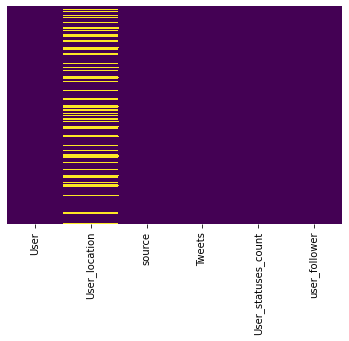

In [13]:
import seaborn as sns
missing_graph = sns.heatmap(amazon.isnull(),cbar=False,yticklabels=False,cmap='viridis')
print(f"Graphically Representation of Missing values : \n {missing_graph}")

# Data Preprocessing and Data Cleaning

In [14]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [15]:
pd.set_option('display.max_colwidth',150)
amazon.head(2)

User        User_location              source  \
0  BonniSmithCSBD  Fort Lauderdale, FL     Twitter Web App   
1        byulmily                 filo  Twitter for iPhone   

                                                                                                                                             Tweets  \
0  RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/BoE4ectG9H   

   User_statuses_count  user_follower  
0                 1500            143  
1                 8001            922

In [16]:
amazon['clean_tweets'] = (amazon['Tweets'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

### **Converted to Lower**

In [17]:
amazon.clean_tweets=amazon.Tweets.str.lower()

### **Removing Url**

In [18]:
amazon['clean_tweets'] = amazon['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
amazon.head(2)

User        User_location              source  \
0  BonniSmithCSBD  Fort Lauderdale, FL     Twitter Web App   
1        byulmily                 filo  Twitter for iPhone   

                                                                                                                                             Tweets  \
0  RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/BoE4ectG9H   

   User_statuses_count  user_follower  \
0                 1500            143   
1                 8001            922   

                                                                                                                                       clean_tweets  
0  rt @rock_health: cool job alert ‼️  our friends at @bestbuy health are hiring for a director of product to lead a portfolio of products &amp; s…  
1                                                                                              the user                         the search history

### **Remove punctuation**

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [21]:
amazon['clean_tweets']=amazon['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [22]:
amazon.head(2)

User        User_location              source  \
0  BonniSmithCSBD  Fort Lauderdale, FL     Twitter Web App   
1        byulmily                 filo  Twitter for iPhone   

                                                                                                                                             Tweets  \
0  RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/BoE4ectG9H   

   User_statuses_count  user_follower  \
0                 1500            143   
1                 8001            922   

                                                                                                                                 clean_tweets  
0  rt rockhealth cool job alert ‼️  our friends at bestbuy health are hiring for a director of product to lead a portfolio of products amp s…  
1                                                                                        the user                         the search history

### **Remove Number**

In [23]:
amazon['clean_tweets'] = amazon['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [24]:
amazon.head(2)

User        User_location              source  \
0  BonniSmithCSBD  Fort Lauderdale, FL     Twitter Web App   
1        byulmily                 filo  Twitter for iPhone   

                                                                                                                                             Tweets  \
0  RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/BoE4ectG9H   

   User_statuses_count  user_follower  \
0                 1500            143   
1                 8001            922   

                                                                                                                                 clean_tweets  
0  rt rockhealth cool job alert ‼️  our friends at bestbuy health are hiring for a director of product to lead a portfolio of products amp s…  
1                                                                                        the user                         the search history

### **Removing Stop Words**

In [25]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
amazon['clean_tweets'] = amazon['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### **Replace the similar code**

In [27]:
import nltk
import re
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [28]:
words = set(nltk.corpus.words.words())

In [29]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [30]:
amazon['clean_tweets']= amazon.clean_tweets.apply(round2)

In [31]:
amazon.head()

User        User_location               source  \
0   BonniSmithCSBD  Fort Lauderdale, FL      Twitter Web App   
1         byulmily                 filo   Twitter for iPhone   
2          sloo567       Deutschland 🇩🇪      Twitter Web App   
3  Visiture_Search          Atlanta, GA       Hootsuite Inc.   
4   NetMediaAgency  Birmingham, England  Twitter for Android   

                                                                                                                                                  Tweets  \
0       RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                            the user                         the search history https://t.co/BoE4ectG9H   
2  @WAXPEER - Instant withdraw (maybe 3rd party payment processor)\n- Litecoin LTC withdraw (more withdraw options)\n- Fix Doppler Phase / Gem search...   
3                              Don't bounce just yet: get informed on how to use bounce rate to measure your user engagement.\n\nhttps://t.co/W8sZSrzuf6   
4  High-performance websites results in high return visits, low bounce rates, higher conversions, engagement, higher ranks in organic search, and bet...   

   User_statuses_count  user_follower  \
0                 1500            143   
1                 8001            922   
2                32050            182   
3                 3381           3638   
4                   22             18   

                                                                                                                                            clean_tweets  
0                                                                                                  cool job alert health director product lead portfolio  
1                                                                                                                                    user search history  
2  instant withdraw maybe party payment processor withdraw withdraw fix phase gem search fix user fix button cant remove fix cancel button mobile sel...  
3                                                                                   dont bounce yet get informed use bounce rate measure user engagement  
4                    high return low bounce higher engagement higher organic search better user experience contact today information design optimization

## **Sentiment analyzer function**

In [32]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [33]:
amazon['Sentiment'] = amazon['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [34]:
n = 2000
print('Original tweet:\n'+amazon['Tweets'][n])
print()
print('Clean tweet:\n'+amazon['clean_tweets'][n])
print()
print('Sentiment:\n'+amazon['Sentiment'][n])

Original tweet:
That's scary #WhatsappPrivacy #WhatsApp WhatsApp’s Private Groups Can Be Seen by Anyone via Google https://t.co/LUcuHzXTdE

Clean tweet:
thats scary private seen anyone via

Sentiment:
Negative


In [35]:
n = 10
print('Original tweet:\n'+amazon['Tweets'][n])
print()
print('Clean tweet:\n'+amazon['clean_tweets'][n])
print()
print('Sentiment:\n'+amazon['Sentiment'][n])

Original tweet:
@allastras I've found that heading to Google and putting into the Google search:
Site:https://t.co/pXE53ofbUT &lt;space&gt; the username &lt;space&gt; and whatever terminology that user put in their tweet 

This will generally find what I'm after.

Clean tweet:
found heading search site whatever terminology user put tweet generally find

Sentiment:
Positive


## **Sentiment Distribution**

## **The sentiment distribution of all the tweets (do most tweets have a positive, negative or neutral context?)**

In [36]:
amazon['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

### **Correlation Between Tweeting Frequency and Followers**


- Plot the number of statuses per user vs. number of followers per user.
- Differentiate between verified and non-verified users in our plot.

In [37]:
amazon.iplot(x='User_statuses_count', y = 'user_follower', mode='markers',
         categories='User',layout=dict(xaxis=dict(type='log', title='No. of Statuses'),yaxis=dict(type='log', title='No. of followers'),
                                                title='No. of statuses vs. No. of followers'))

## **Most frequent tweets values**

In [38]:
def most_frequent_values(data):
    total = amazon.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(amazon)

User User_location               source  \
Total                        3000          2158                 2977   
Most frequent item  Mortgage_Shop         India  Twitter for Android   
Frequence                      53            66                  994   
Percent from total          1.767         3.058               33.389   

                                                                                                                                                          Tweets  \
Total                                                                                                                                                       3000   
Most frequent item  RT @rajaharia: Your @WhatsApp groups may not be as secure as you think they are. WhatsApp Group Chat Invite Links, User Profiles Made Publi…   
Frequence                                                                                                                                                    311   
Percent from total                                                                                                                                        10.367   

                   User_statuses_count user_follower  \
Total                             3000          3000   
Most frequent item              626750          1961   
Frequence                           53            53   
Percent from total               1.767         1.767   

                                                          clean_tweets  \
Total                                                             3000   
Most frequent item  may secure think group chat invite links user made   
Frequence                                                          316   
Percent from total                                              10.533   

                   Sentiment  
Total                   3000  
Most frequent item  Positive  
Frequence               1617  
Percent from total      53.9

In [39]:
top_ten_tweets = amazon['Tweets'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet


In [40]:
top_ten_tweets

332     🤡 twt new issue bug again... some acc cant search or see other acc when open it and theres "this user does not exist." What again omg sksksk but s...
670     🚨 NEW: CVE-2021-21010 🚨 InCopy version 15.1.1 (and earlier) for Windows is affected by an uncontrolled search path vulnerability that could result...
644     🚨 NEW: CVE-2021-21008 🚨 Adobe Animate version 21.0 (and earlier) is affected by an uncontrolled search path element that could result in arbitrary...
669     🚨 NEW: CVE-2021-21008 🚨 Adobe Animate version 21.0 (and earlier) is affected by an uncontrolled search path element that could result in arbitrary...
668     🚨 NEW: CVE-2021-21007 🚨 Adobe Illustrator version 25.0 (and earlier) is affected by an uncontrolled search path element that could result in arbit...
1235    🚨 NEW: CVE-2020-26979 🚨 When a user typed a URL in the address bar or the search bar and quickly hit the enter key, a website could sometimes capt...
715     🔷🔹⚜️The Yeda Radio ⚜️🔹🔷\n#appletv #iTunes Se

## **Plot Most frequent Words**

In [41]:
word_series = pd.Series(' '.join(amazon['Tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

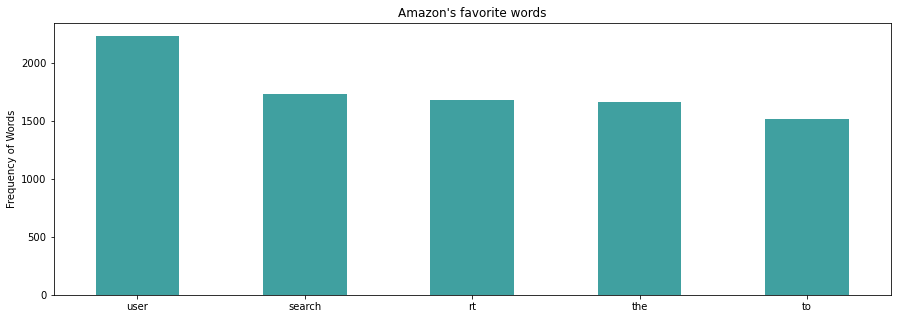

In [42]:
plt.figure(figsize=(15,5))
plt.title("Amazon's favorite words")

top_freq.plot(kind='bar',color='teal',alpha=0.75, rot=0)                            
plt.ylabel('Frequency of Words')
plt.show()

In [43]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

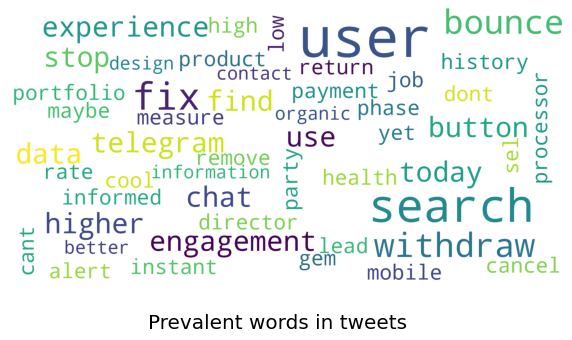

In [44]:
show_wordcloud(amazon['clean_tweets'], title = 'Prevalent words in tweets')


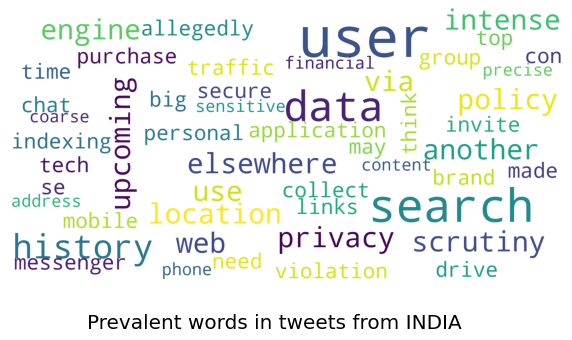

In [45]:
india_df = amazon.loc[amazon.User_location=="India"]
show_wordcloud(india_df['clean_tweets'], title = 'Prevalent words in tweets from INDIA ')

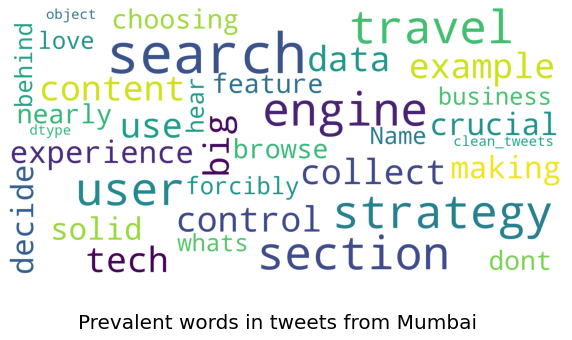

In [46]:
mumbai_df = amazon.loc[amazon.User_location=="Mumbai"]
show_wordcloud(mumbai_df['clean_tweets'], title = 'Prevalent words in tweets from Mumbai')

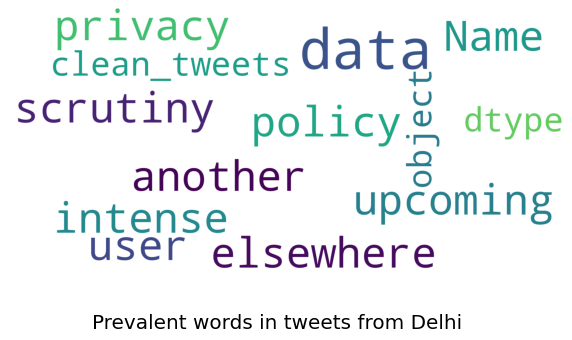

In [47]:
delhi_df = amazon.loc[amazon.User_location=="Delhi"]
show_wordcloud(delhi_df['clean_tweets'], title = 'Prevalent words in tweets from Delhi')

## **User Tweets Location**

In [48]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

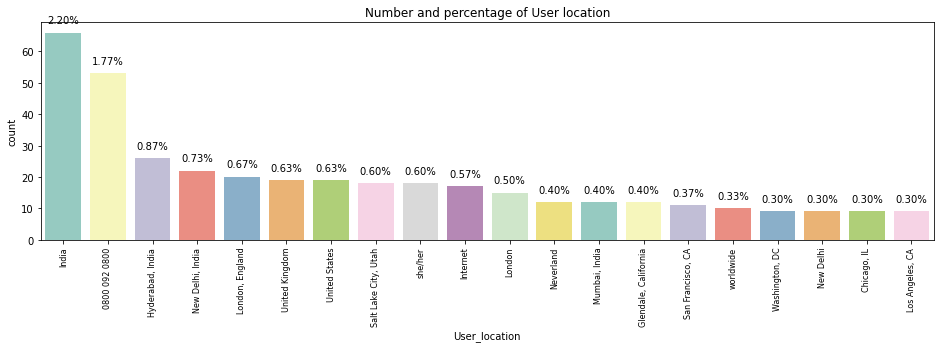

In [49]:
plot_count("User_location", "User location", amazon,4)

## **Top15 ratio on locations:**

In [50]:
loc_analysis = pd.DataFrame(amazon['User_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'User_location':'count'})

In [51]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

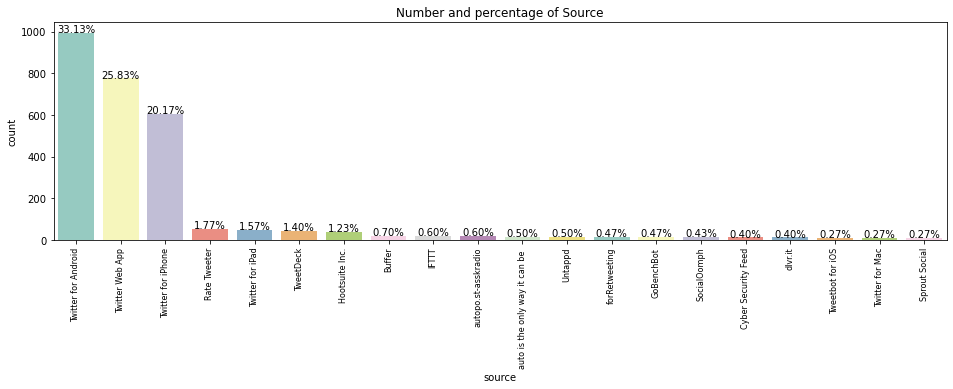

In [52]:
plot_count("source", "Source", amazon,4)

----------------------------------------------------------------------------------------------------------------------

# Analysis the Product

In [53]:
amazon_product = pd.read_csv("Amazon_Final.csv")

In [54]:
amazon_product.head()

user          location               source  \
0  VINODVA10591208               NaN  Twitter for Android   
1    idubeynirbhay  New Delhi, India      Twitter Web App   
2         aliyaqut             India   Twitter for iPhone   
3  VINODVA10591208               NaN  Twitter for Android   
4         PavanZzz               NaN      Twitter Web App   

                                                                                                                                                    text  \
0  I have ordered myfitfuel gym power on Amazon od no 40700884689765970 receive expired product I have returned but Amazon not given refund, Amazon s...   
1                                                                                                         @amazonIN payment getting declined repeatedly.   
2  @Flipkart @Paytm @zomato Why don't you guys order from @amazonIN. You can now eat from Amazon, study from amazon and also @Flipkart you can order ...   
3  I have ordered myfitfuel gym power on Amazon od no 40700884689765970 receive expired product I have returned but Amazon not given refund @AmazonHe...   
4  @amazonIN Hi, I need to give out gift vouchers to winners of a contest that we conducted (total value INR 30k &amp; around 45 vouchers in total).\...   

                      product  
0  Camera & Photo Accessories  
1  Camera & Photo Accessories  
2  Camera & Photo Accessories  
3  Camera & Photo Accessories  
4  Camera & Photo Accessories

# Data Preprocessing and Data Cleaning

In [55]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [58]:
amazon_product['clean_tweets'] = (amazon_product['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [59]:
amazon_product.clean_tweets=amazon_product.text.str.lower()

In [61]:
# Removing URL
amazon_product['clean_tweets'] = amazon_product['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
amazon_product.head(2)

user          location               source  \
0  VINODVA10591208               NaN  Twitter for Android   
1    idubeynirbhay  New Delhi, India      Twitter Web App   

                                                                                                                                                    text  \
0  I have ordered myfitfuel gym power on Amazon od no 40700884689765970 receive expired product I have returned but Amazon not given refund, Amazon s...   
1                                                                                                         @amazonIN payment getting declined repeatedly.   

                      product  \
0  Camera & Photo Accessories   
1  Camera & Photo Accessories   

                                                                                                                                            clean_tweets  
0  i have ordered myfitfuel gym power on amazon od no 40700884689765970 receive expired product i have returned but amazon not given refund, amazon s...  
1                                                                                                         @amazonin payment getting declined repeatedly.

In [62]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [64]:
amazon_product['clean_tweets']=amazon_product['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [65]:
# Remove Number
amazon_product['clean_tweets'] = amazon_product['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [66]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
amazon_product['clean_tweets'] = amazon_product['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [68]:
# Replace the similar code
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [69]:
words = set(nltk.corpus.words.words())

In [70]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [71]:
amazon_product['clean_tweets']= amazon_product.clean_tweets.apply(round2)

In [72]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'


In [73]:
amazon_product['Sentiment'] = amazon_product['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [74]:
amazon_product['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

In [80]:
counts = amazon_product["product"].value_counts()
counts

Travel accessories            600
Books                         600
Camera & Photo Accessories    600
Beauty & Care                 305
Video Games                    86
Name: product, dtype: int64

In [81]:
Result = pd.crosstab(index=amazon_product['product'], columns=amazon_product['Sentiment'],margins=True)
Result 

Sentiment                   Negative  Neutral  Positive   All
product                                                      
Beauty & Care                    125       70       110   305
Books                            109      219       272   600
Camera & Photo Accessories       109      219       272   600
Travel accessories               110      219       271   600
Video Games                        6        4        76    86
All                              459      731      1001  2191

###  Source from where they are Tweeted

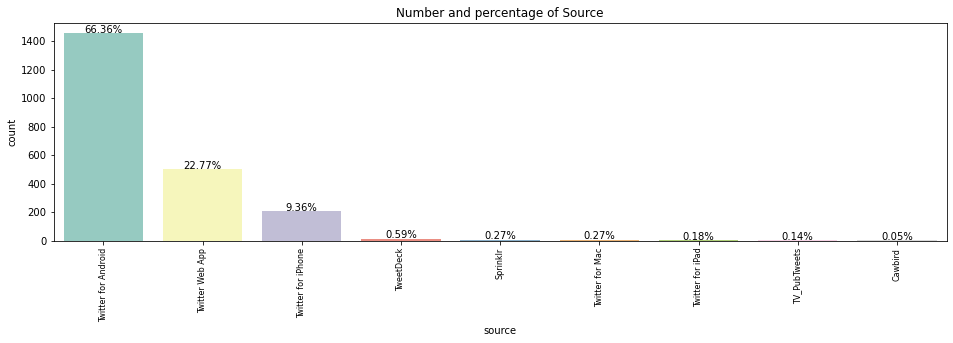

In [78]:
plot_count("source", "Source", amazon_product,4)

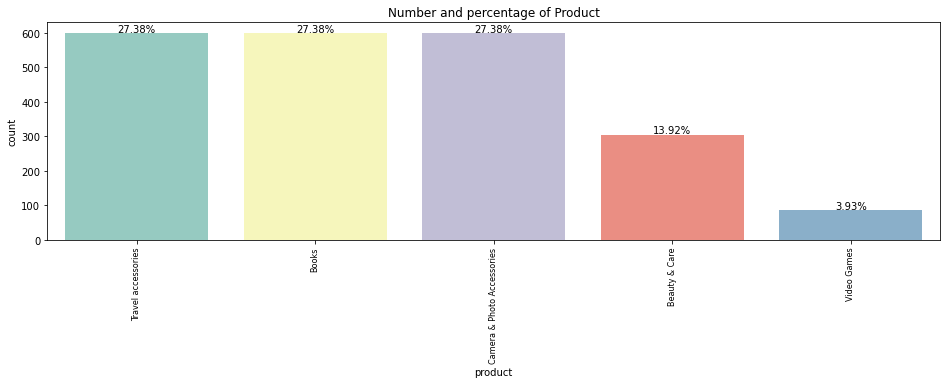

In [77]:
plot_count("product", "Product", amazon_product,4)

----------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------

# Extracting tweets for different Products from Snapdeal- India and saving those tweets in csv file


In [82]:

import tweepy as tw
Commonwords = ''
# input for term to be searched and how many tweets to search
NoOfTerms = int(input("Enter how many tweets to Fetch: "))
#new_search = searchTerm + " -filter:retweets""
#new_search
user_search=input("Enter tweets  to search words:")
new_search = "user_search"
ProductTerm =''
        # input for term to be searched and how many tweets to search       
#searchTerm = input(color.BOLD +"Enter Keyword/Tag to search for (e.g. AmazonIn, FlipCart, SnapDeal): "+ color.END)
ProductFlag = input( "Want to fetch for particular product (Y or N) ? :")
        
if ProductFlag == "Y" or ProductFlag == "y":  # If search is for particular product
    ProductTerm = input("Enter particular product : ")
    user_search = user_search + " " + ProductTerm
    Commonwords = ProductTerm
elif ProductFlag == "N" or ProductFlag == "n":  # If search is not for particular product
    Commonwords = ''
    user_search = user_search
else: 
    print("Invalid input !! Try Again and please enter Y or N.") 
            

tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode='extended',count=100,
                       lang="en").items(NoOfTerms)

users_locs = [[tweet.user.screen_name, tweet.user.location ,tweet.source,tweet.full_text,tweet.user.statuses_count,tweet.user.followers_count] for tweet in tweets ]
users_locs
tweet_snapdeal = pd.DataFrame(data=users_locs, 
                    columns=["User", "User_location","source","Tweets","User_statuses_count","user_follower"])
tweet_snapdeal

Enter how many tweets to Fetch: 3000
Enter tweets  to search words:Snapdeal
Want to fetch for particular product (Y or N) ? :N


User                User_location               source  \
0         DennisCheru               Nairobi, Kenya  Twitter for Android   
1         cipherstorm                     Internet              dlvr.it   
2         shah_sheikh  Dubai, United Arab Emirates              dlvr.it   
3     local_residents                   Texas, USA   Twitter for iPhone   
4         bjohnson_io                    Tampa, FL  Twitter for Android   
...               ...                          ...                  ...   
2995      MakingJamie                     Budapest      Twitter Web App   
2996  spctculrspcul8r              Los Angeles, CA      Twitter Web App   
2997   ChangingPlcPNW                     MO CA WA   Twitter for iPhone   
2998  LockpickingPete                     Germany       Twitter Web App   
2999     OsintCurious        We are international!   Twitter for iPhone   

                                                                                                                                                     Tweets  \
0               RT @MisterAlbie: WhatsApp groups are showing up on Google search yet again. As a result, anyone could discover and join a private WhatsApp…   
1     Ubuntu Security Notice USN-4693-1: Ubuntu Security Notice 4693-1 - It was discovered that an SQL injection vulnerability exists in the Ampache sea...   
2     Ubuntu Security Notice USN-4693-1: Ubuntu Security Notice 4693-1 - It was discovered that an SQL injection vulnerability exists in the Ampache sea...   
3              @SyrianEiad @Croydonhammer78 @MrDalekJD Did you do what the other user suggested?  Search for Cold War zombies in the store and it finds it.   
4              RT @petermarshallio: Sifting through all that there is on #apachedruid can be a bit painful so I’m really looking forward to the https://t.…   
...                                                                                                                                                     ...   
2995      RT @polkadot_tiger: #4 Trend: Shift the focus to Search Intent\nSemantic search &amp; search intent optimization have been rising trends for a w…   
2996  "Google uses user-level search history data to optimize search rankings, Netflix leverages user feedback to personalize content recommendations, T...   
2997           RT @osintcombine: [#OSINT Tip] Want to search on a person's Facebook timeline but can't see the search icon in the UI? Just change the foll…   
2998           RT @osintcombine: [#OSINT Tip] Want to search on a person's Facebook timeline but can't see the search icon in the UI? Just change the foll…   
2999           RT @osintcombine: [#OSINT Tip] Want to search on a person's Facebook timeline but can't see the search icon in the UI? Just change the foll…   

      User_statuses_count  user_follower  
0                   43721           1636  
1                  183027           2149  
2                   87107           1570  
3                    1145             90  
4                     258             64  
...                   ...            ...  
2995                14036            524  
2996                  734            252  
2997                 4272             60  
2998                18261           1576  
2999                 1093          18074  

[3000 rows x 6 columns]

In [83]:
tweet_snapdeal.to_csv("SnapdealData.csv",index=False)

In [84]:
snapdeal= pd.read_csv("SnapdealData.csv")


# Let's Analyze Some Tweets

In [85]:
snapdeal.head(3)

User                User_location               source  \
0  DennisCheru               Nairobi, Kenya  Twitter for Android   
1  cipherstorm                     Internet              dlvr.it   
2  shah_sheikh  Dubai, United Arab Emirates              dlvr.it   

                                                                                                                                                  Tweets  \
0            RT @MisterAlbie: WhatsApp groups are showing up on Google search yet again. As a result, anyone could discover and join a private WhatsApp…   
1  Ubuntu Security Notice USN-4693-1: Ubuntu Security Notice 4693-1 - It was discovered that an SQL injection vulnerability exists in the Ampache sea...   
2  Ubuntu Security Notice USN-4693-1: Ubuntu Security Notice 4693-1 - It was discovered that an SQL injection vulnerability exists in the Ampache sea...   

   User_statuses_count  user_follower  
0                43721           1636  
1               183027           2149  
2                87107           1570

In [86]:
snapdeal.columns

Index(['User', 'User_location', 'source', 'Tweets', 'User_statuses_count',
       'user_follower'],
      dtype='object')

In [87]:
data_shape =  snapdeal.shape
print(f"Shape of the dataset {data_shape}")

Shape of the dataset (3000, 6)


In [88]:
snapdeal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User                 3000 non-null   object
 1   User_location        2162 non-null   object
 2   source               2977 non-null   object
 3   Tweets               3000 non-null   object
 4   User_statuses_count  3000 non-null   int64 
 5   user_follower        3000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 140.8+ KB


In [89]:
snapdeal.describe().style.highlight_max(color="green").highlight_min(color="lightgreen")

# Check Missing values

Graphically Representation of Missing values : 
 AxesSubplot(0.125,0.125;0.775x0.755)


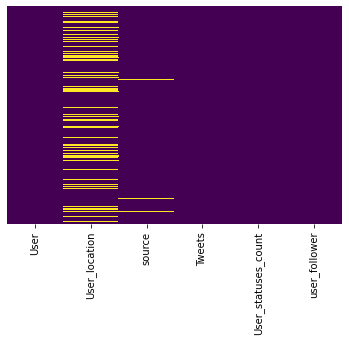

In [93]:
import seaborn as sns
missing_graph = sns.heatmap(snapdeal.isnull(),cbar=False,yticklabels=False,cmap='viridis')
print(f"Graphically Representation of Missing values : \n {missing_graph}")

# Data Preprocessing and Data Cleaning

In [91]:
# To remove the Ascent letter
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [92]:
pd.set_option('display.max_colwidth',150)
amazon.head(2)

User        User_location              source  \
0  BonniSmithCSBD  Fort Lauderdale, FL     Twitter Web App   
1        byulmily                 filo  Twitter for iPhone   

                                                                                                                                             Tweets  \
0  RT @Rock_Health: Cool job alert ‼️  Our friends at @bestbuy Health are hiring for a Director of Product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/BoE4ectG9H   

   User_statuses_count  user_follower  \
0                 1500            143   
1                 8001            922   

                                                                                                                                       clean_tweets  \
0  rt @rock_health: cool job alert ‼️  our friends at @bestbuy health are hiring for a director of product to lead a portfolio of products &amp; s…   
1                                                                       the user                         the search history https://t.co/boe4ectg9h   

  Sentiment  
0  Positive  
1   Neutral

In [94]:
snapdeal['clean_tweets'] = (snapdeal['Tweets'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [96]:
snapdeal.clean_tweets=amazon.Tweets.str.lower()

In [97]:
# Removing Url
snapdeal['clean_tweets'] = snapdeal['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
snapdeal.head(2)

User   User_location               source  \
0  DennisCheru  Nairobi, Kenya  Twitter for Android   
1  cipherstorm        Internet              dlvr.it   

                                                                                                                                                  Tweets  \
0            RT @MisterAlbie: WhatsApp groups are showing up on Google search yet again. As a result, anyone could discover and join a private WhatsApp…   
1  Ubuntu Security Notice USN-4693-1: Ubuntu Security Notice 4693-1 - It was discovered that an SQL injection vulnerability exists in the Ampache sea...   

   User_statuses_count  user_follower  \
0                43721           1636   
1               183027           2149   

                                                                                                                                       clean_tweets  
0  rt @rock_health: cool job alert ‼️  our friends at @bestbuy health are hiring for a director of product to lead a portfolio of products &amp; s…  
1                                                                                              the user                         the search history

In [98]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [100]:
snapdeal['clean_tweets']=snapdeal['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [101]:
# Remove Number
snapdeal['clean_tweets'] = snapdeal['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [102]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
snapdeal['clean_tweets'] = snapdeal['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [104]:
# Replace the similar code
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [105]:
words = set(nltk.corpus.words.words())

In [106]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [107]:
snapdeal['clean_tweets']= snapdeal.clean_tweets.apply(round2)

# Sentiment analyzer function

In [108]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [109]:
snapdeal['Sentiment'] = snapdeal['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [111]:
n = 1500
print('Original tweet:\n'+snapdeal['Tweets'][n])
print()
print('Clean tweet:\n'+snapdeal['clean_tweets'][n])
print()
print('Sentiment:\n'+snapdeal['Sentiment'][n])

Original tweet:
arm64/Linux https://t.co/TeVZPVS06N
ns/op:: HexToCompact-4:-9.1%, GM:-1.2%, Bindata-4:+6.7%
build-user-ns/op:: Cespare_mph:-13%, GM:-0.14%, Capnproto2:+7.7% https://t.co/1EaOCD1KgA

Clean tweet:
search user key word

Sentiment:
Neutral


# The sentiment distribution of all the tweets (do most tweets have a positive, negative or neutral context?)

In [112]:
snapdeal['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

In [113]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

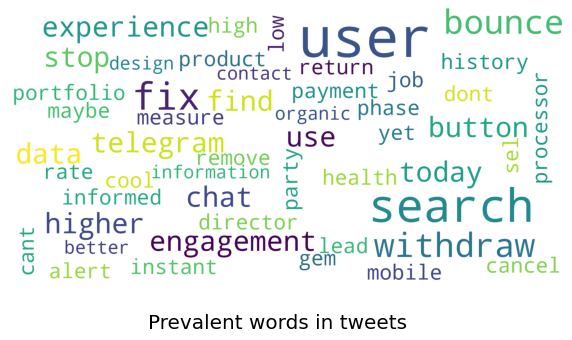

In [114]:
show_wordcloud(snapdeal['clean_tweets'], title = 'Prevalent words in tweets')


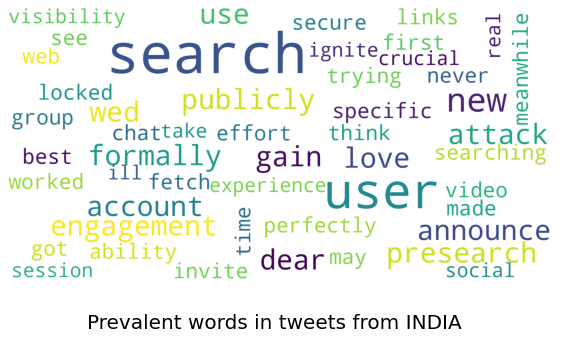

In [115]:
india_df = snapdeal.loc[snapdeal.User_location=="India"]
show_wordcloud(india_df['clean_tweets'], title = 'Prevalent words in tweets from INDIA ')

In [116]:
# User Location
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

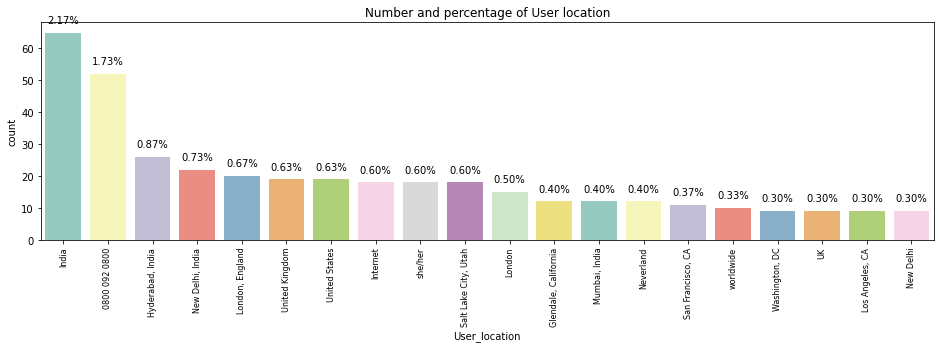

In [117]:
plot_count("User_location", "User location", snapdeal,4)

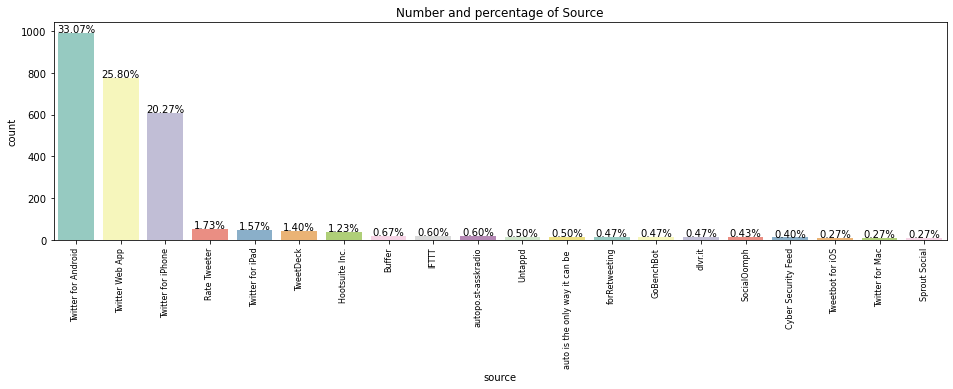

In [118]:
plot_count("source", "Source", snapdeal,4)

# Analysis of Snapdeal Product.

In [123]:
snapdeal_product = pd.read_csv("Snapdeal_Final.csv")

In [124]:
snapdeal_product.head()

user       location               source  \
0         4psNews            NaN      Twitter Web App   
1    Chalta_Purja          Earth   Twitter for iPhone   
2   Snapdeal_Help          India  OneDirect Suite - P   
3  LondonRagIndia  Mumbai, India       Hootsuite Inc.   
4       RealtyNXT            NaN      Twitter Web App   

                                                                                                                                                    text  \
0  Snapdeal’s extensive reach in smaller cities and towns of India is helping India’s leading FMCG brands take their value selection deeper into Bhar...   
1                              Snapdeal, 4 Indian shopping complexes feature in 'notorious markets' list by US \nhttps://t.co/dERFE1bzau\n-via @inshorts   
2                                       @AmalKumarPatta1 Hi! We have connected with you and updated you with the best possible resolution. Thanks! Karan   
3  Best fit for casual, office, travelling, hangout.\n.\n.\n.\n#Fridayday #RedTshirt #WomensFashion #Shoes #ootd #ShoeSale #NewYearSale \nAlso availa...   
4  #NewsUpdate | #Snapdeal along with four Indian #shopping complexes, two of them in #NewDelhi alone, have figured in latest 2020 Review of #Notorio...   

                      product  
0  Camera & Photo Accessories  
1  Camera & Photo Accessories  
2  Camera & Photo Accessories  
3  Camera & Photo Accessories  
4  Camera & Photo Accessories

In [125]:
# Data Preprocessing and Data Cleaning
# To remove the Ascent letter

characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [127]:
pd.set_option('display.max_colwidth',150)
snapdeal_product.head(2)

user location              source  \
0       4psNews      NaN     Twitter Web App   
1  Chalta_Purja    Earth  Twitter for iPhone   

                                                                                                                                                    text  \
0  Snapdeal’s extensive reach in smaller cities and towns of India is helping India’s leading FMCG brands take their value selection deeper into Bhar...   
1                              Snapdeal, 4 Indian shopping complexes feature in 'notorious markets' list by US \nhttps://t.co/dERFE1bzau\n-via @inshorts   

                      product  
0  Camera & Photo Accessories  
1  Camera & Photo Accessories

In [129]:
snapdeal_product['clean_tweets'] = (snapdeal_product['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [130]:
# Converted to Lower
snapdeal_product.clean_tweets=snapdeal_product.text.str.lower()

In [131]:
# Removing Url
snapdeal_product['clean_tweets'] = snapdeal_product['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
snapdeal_product.head(2)

user location              source  \
0       4psNews      NaN     Twitter Web App   
1  Chalta_Purja    Earth  Twitter for iPhone   

                                                                                                                                                    text  \
0  Snapdeal’s extensive reach in smaller cities and towns of India is helping India’s leading FMCG brands take their value selection deeper into Bhar...   
1                              Snapdeal, 4 Indian shopping complexes feature in 'notorious markets' list by US \nhttps://t.co/dERFE1bzau\n-via @inshorts   

                      product  \
0  Camera & Photo Accessories   
1  Camera & Photo Accessories   

                                                                                                                                            clean_tweets  
0  snapdeal’s extensive reach in smaller cities and towns of india is helping india’s leading fmcg brands take their value selection deeper into bhar...  
1                                                     snapdeal, 4 indian shopping complexes feature in 'notorious markets' list by us \n\n-via @inshorts

In [132]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [133]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [134]:
snapdeal_product['clean_tweets']=snapdeal_product['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [135]:
snapdeal_product.head(2)

user location              source  \
0       4psNews      NaN     Twitter Web App   
1  Chalta_Purja    Earth  Twitter for iPhone   

                                                                                                                                                    text  \
0  Snapdeal’s extensive reach in smaller cities and towns of India is helping India’s leading FMCG brands take their value selection deeper into Bhar...   
1                              Snapdeal, 4 Indian shopping complexes feature in 'notorious markets' list by US \nhttps://t.co/dERFE1bzau\n-via @inshorts   

                      product  \
0  Camera & Photo Accessories   
1  Camera & Photo Accessories   

                                                                                                                                            clean_tweets  
0  snapdeal’s extensive reach in smaller cities and towns of india is helping india’s leading fmcg brands take their value selection deeper into bhar...  
1                                                          snapdeal 4 indian shopping complexes feature in notorious markets list by us \n\nvia inshorts

In [136]:
# Remove Number
snapdeal_product['clean_tweets'] = snapdeal_product['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [137]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
snapdeal_product['clean_tweets'] = snapdeal_product['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [139]:
# Replace the similar code
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [140]:
words = set(nltk.corpus.words.words())

In [141]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [142]:
snapdeal_product['clean_tweets']= snapdeal_product.clean_tweets.apply(round2)

# Sentiment analyzer function

In [143]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'


In [144]:
snapdeal_product['Sentiment'] = snapdeal_product['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [145]:
snapdeal_product['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

In [146]:
word_series = pd.Series(' '.join(snapdeal_product['clean_tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

In [147]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


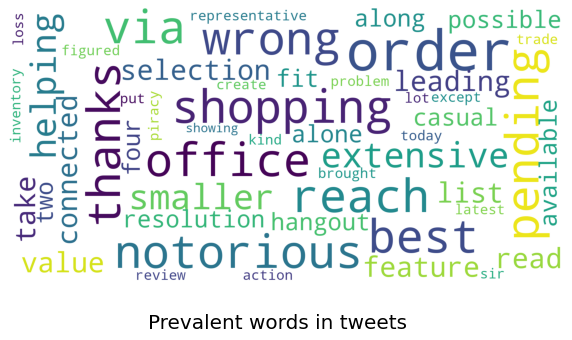

In [148]:
show_wordcloud(snapdeal_product['clean_tweets'], title = 'Prevalent words in tweets')


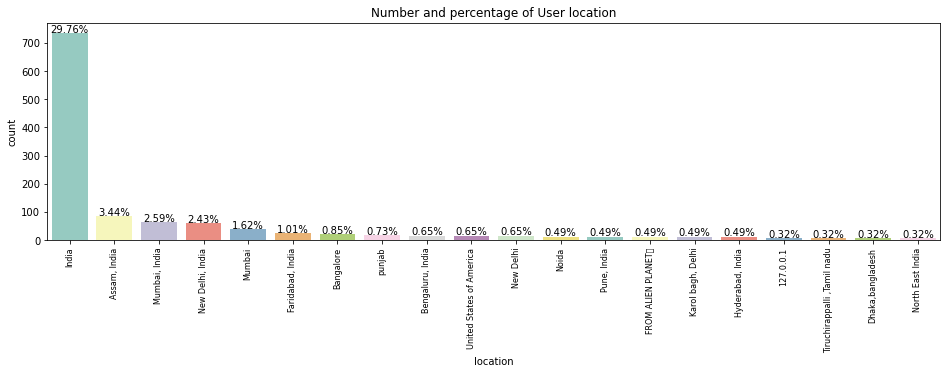

In [151]:
plot_count("location", "User location", snapdeal,4)

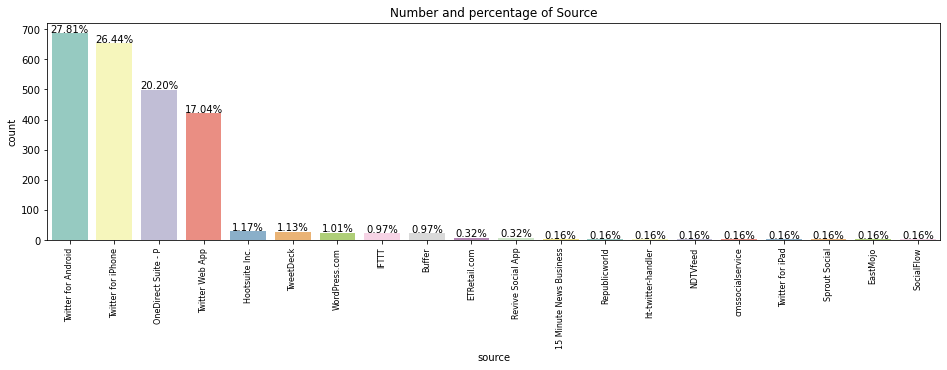

In [152]:
plot_count("source", "Source", snapdeal_product,4)

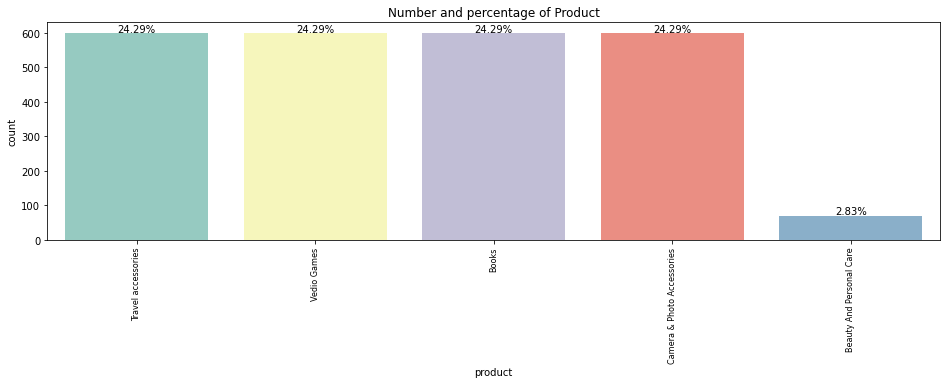

In [154]:
plot_count("product", "Product", snapdeal_product,4)

---------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------

# FlipKart Sentimental Analysis

In [157]:

import tweepy as tw
Commonwords = ''
# input for term to be searched and how many tweets to search
NoOfTerms = int(input("Enter how many tweets to Fetch: "))
#new_search = searchTerm + " -filter:retweets""
#new_search
user_search=input("Enter tweets  to search words:")
new_search = "user_search"
ProductTerm =''
        # input for term to be searched and how many tweets to search       
#searchTerm = input(color.BOLD +"Enter Keyword/Tag to search for (e.g. AmazonIn, FlipCart, SnapDeal): "+ color.END)
ProductFlag = input( "Want to fetch for particular product (Y or N) ? :")
        
if ProductFlag == "Y" or ProductFlag == "y":  # If search is for particular product
    ProductTerm = input("Enter particular product : ")
    user_search = user_search + " " + ProductTerm
    Commonwords = ProductTerm
elif ProductFlag == "N" or ProductFlag == "n":  # If search is not for particular product
    Commonwords = ''
    user_search = user_search
else: 
    print("Invalid input !! Try Again and please enter Y or N.") 
            

tweets = tw.Cursor(api.search,
                       q=new_search,tweet_mode='extended',count=100,
                       lang="en").items(NoOfTerms)

users_locs = [[tweet.user.screen_name, tweet.user.location ,tweet.source,tweet.full_text,tweet.user.statuses_count,tweet.user.followers_count] for tweet in tweets ]
users_locs
tweet_flipcart = pd.DataFrame(data=users_locs, 
                    columns=["User", "User_location","source","Tweets","User_statuses_count","user_follower"])
tweet_flipcart

Enter how many tweets to Fetch: 3000
Enter tweets  to search words:flipkart
Want to fetch for particular product (Y or N) ? :N


User                                         User_location  \
0         sleepynxna                                             They/Them   
1         CrisTh0mas                              Kick Turkey Out Of NATO    
2          BethJaneC                                   South East, England   
3      INmarketingOz  Melbourne | Cairns | Singapore | Sierra Vista | Bali   
4       shane_barker                              Sacramento - Los Angeles   
...              ...                                                   ...   
2995       panichodl                                            ☭Krakozhia   
2996   TeamPresearch                                                         
2997   presearchnews                                                         
2998      alenanik11                                   Düsseldorf, Germany   
2999  reinnovate_biz                                                         

                   source  \
0         Twitter Web App   
1     Twitter for Android   
2     Twitter for Android   
3                   IFTTT   
4                  Buffer   
...                   ...   
2995  Twitter for Android   
2996   Twitter for iPhone   
2997   Twitter for iPhone   
2998   Twitter for iPhone   
2999            GaggleAMP   

                                                                                                                                                     Tweets  \
0     If this person tells you to search for "HeyItsKyanana is trusted" just want to say, those are MY proof. they've been impersonating me for a while ...   
1              RT @PrisonPlanet: A Twitter user confirmed that Amazon is selling childrens’ dolls that are described as “anatomically correct” and refer t…   
2     @TS_Claudi In the search bar , enter your user name first eg:TS_Claudi  then put 2 or 3 key words you would have used eg: danny duet gary \nIts su...   
3                                                      TikTok Beats Facebook in Time Spent Per User via @MattGSouthern https://t.co/4edqcDWTau #SEARCH #SEO   
4     Want to know how to find your competitors on #Instagram and analyze their profiles quickly?\n\nRead on to learn how to use the User Search and Pro...   
...                                                                                                                                                     ...   
2995         RT @presearchnews: Dear Presearchers,\n\nWe'd love to formally announce we're publicly launching the new Presearch decentralized search engin…   
2996         RT @presearchnews: Dear Presearchers,\n\nWe'd love to formally announce we're publicly launching the new Presearch decentralized search engin…   
2997  Dear Presearchers,\n\nWe'd love to formally announce we're publicly launching the new Presearch decentralized search engine, powered by user nodes...   
2998  @LissetteIbnz @kentcdodds “When a user is redirect via JavaScript, there's no way to inform the browser (or search engines) that the URL they were...   
2999           RT @Sitefinity: If your website utilizes effective search tools and brief, informative videos, your website visitors will have a better use…   

      User_statuses_count  user_follower  
0                    7237            241  
1                    7348            111  
2                   13341            326  
3                  137871           7712  
4                   80228          30258  
...                   ...            ...  
2995                 3573            499  
2996                 3377           8217  
2997                  672           9834  
2998                 2600           1123  
2999                  119              7  

[3000 rows x 6 columns]

In [159]:
tweet_flipcart.to_csv("FlipkartData.csv",index=False)

In [158]:
flipkart = pd.read_csv("FlipkartData.csv")

In [160]:
flipkart.columns

Index(['User', 'User_location', 'source', 'Tweets', 'User_statuses_count',
       'user_follower'],
      dtype='object')

In [161]:
data_shape =  flipkart.shape
print(f"Shape of the dataset {data_shape}")

Shape of the dataset (3000, 6)


In [162]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User                 3000 non-null   object
 1   User_location        2159 non-null   object
 2   source               2977 non-null   object
 3   Tweets               3000 non-null   object
 4   User_statuses_count  3000 non-null   int64 
 5   user_follower        3000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 140.8+ KB


In [163]:
flipkart.describe().style.highlight_max(color="green").highlight_min(color="lightgreen")

# Check Missing values

Graphically Representation of Missing values : 
 AxesSubplot(0.125,0.125;0.775x0.755)


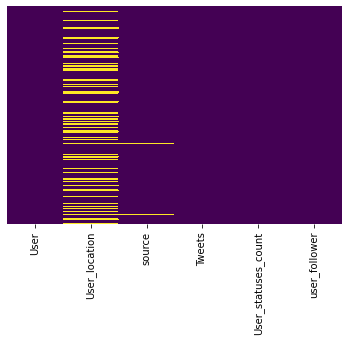

In [164]:
import seaborn as sns
missing_graph = sns.heatmap(flipkart.isnull(),cbar=False,yticklabels=False,cmap='viridis')
print(f"Graphically Representation of Missing values : \n {missing_graph}")

# Data Preprocessing and Data Cleaning

In [168]:
# To remove the Ascent letter
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [170]:
pd.set_option('display.max_colwidth',150)
flipkart.head(2)

User             User_location               source  \
0  sleepynxna                 They/Them      Twitter Web App   
1  CrisTh0mas  Kick Turkey Out Of NATO   Twitter for Android   

                                                                                                                                                  Tweets  \
0  If this person tells you to search for "HeyItsKyanana is trusted" just want to say, those are MY proof. they've been impersonating me for a while ...   
1           RT @PrisonPlanet: A Twitter user confirmed that Amazon is selling childrens’ dolls that are described as “anatomically correct” and refer t…   

   User_statuses_count  user_follower  
0                 7237            240  
1                 7348            111

In [171]:
flipkart['clean_tweets'] = (flipkart['Tweets'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [173]:
flipkart.clean_tweets=flipkart.Tweets.str.lower()

In [174]:
# Removing Url
flipkart['clean_tweets'] = flipkart['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
flipkart.head(2)

User             User_location               source  \
0  sleepynxna                 They/Them      Twitter Web App   
1  CrisTh0mas  Kick Turkey Out Of NATO   Twitter for Android   

                                                                                                                                                  Tweets  \
0  If this person tells you to search for "HeyItsKyanana is trusted" just want to say, those are MY proof. they've been impersonating me for a while ...   
1           RT @PrisonPlanet: A Twitter user confirmed that Amazon is selling childrens’ dolls that are described as “anatomically correct” and refer t…   

   User_statuses_count  user_follower  \
0                 7237            240   
1                 7348            111   

                                                                                                                                            clean_tweets  
0  if this person tells you to search for "heyitskyanana is trusted" just want to say, those are my proof. they've been impersonating me for a while ...  
1           rt @prisonplanet: a twitter user confirmed that amazon is selling childrens’ dolls that are described as “anatomically correct” and refer t…

In [175]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [176]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [177]:
flipkart['clean_tweets']=flipkart['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [178]:
# Remove Number
flipkart['clean_tweets'] = flipkart['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [179]:
# Removing Stop Words
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
flipkart['clean_tweets'] = flipkart['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [181]:
# Replace the similar code
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [182]:
words = set(nltk.corpus.words.words())

In [183]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [184]:
flipkart['clean_tweets']= flipkart.clean_tweets.apply(round2)

# Sentiment analyzer function

In [185]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'


In [186]:
flipkart['Sentiment'] = flipkart['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [187]:
n = 2000
print('Original tweet:\n'+flipkart['Tweets'][n])
print()
print('Clean tweet:\n'+flipkart['clean_tweets'][n])
print()
print('Sentiment:\n'+flipkart['Sentiment'][n])

Original tweet:
@awholelottanner @RepChrisStewart @SportsmansWH @ZionsBank @LHM @CREngland @doterra @Huntsman_Corp @VistaOutdoorInc @RioTinto I’m getting my information about Stewart from Open Secrets. They have best, user friendly reports. You can also search the Federal Elections Commission at https://t.co/E9jWccOtiS https://t.co/SVb3fMiFvi.

Clean tweet:
getting information open best user friendly also search federal commission

Sentiment:
Positive


### **The sentiment distribution of all the tweets (do most tweets have a positive, negative or neutral context?)**

In [189]:
flipkart['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

### **Correlation Between Tweeting Frequency and Followers**


- Plot the number of statuses per user vs. number of followers per user.
- Differentiate between verified and non-verified users in our plot.

In [191]:
flipkart.iplot(x='User_statuses_count', y = 'user_follower', mode='markers',
         categories='User',layout=dict(xaxis=dict(type='log', title='No. of Statuses'),yaxis=dict(type='log', title='No. of followers'),
                                                title='No. of statuses vs. No. of followers'))

In [192]:
# Most frequent tweets values
def most_frequent_values(data):
    total = amazon.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(flipkart)

User User_location               source  \
Total                        3000          2158                 2977   
Most frequent item  Mortgage_Shop         India  Twitter for Android   
Frequence                      51            65                  999   
Percent from total            1.7         3.012               33.557   

                                                                                                                                                          Tweets  \
Total                                                                                                                                                       3000   
Most frequent item  RT @rajaharia: Your @WhatsApp groups may not be as secure as you think they are. WhatsApp Group Chat Invite Links, User Profiles Made Publi…   
Frequence                                                                                                                                                    315   
Percent from total                                                                                                                                          10.5   

                   User_statuses_count user_follower  \
Total                             3000          3000   
Most frequent item              626773          1960   
Frequence                           51            51   
Percent from total                 1.7           1.7   

                                                          clean_tweets  \
Total                                                             3000   
Most frequent item  may secure think group chat invite links user made   
Frequence                                                          320   
Percent from total                                              10.667   

                   Sentiment  
Total                   3000  
Most frequent item  Positive  
Frequence               1630  
Percent from total    54.333

In [193]:
# Plot Most frequent Words
word_series = pd.Series(' '.join(flipkart['Tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

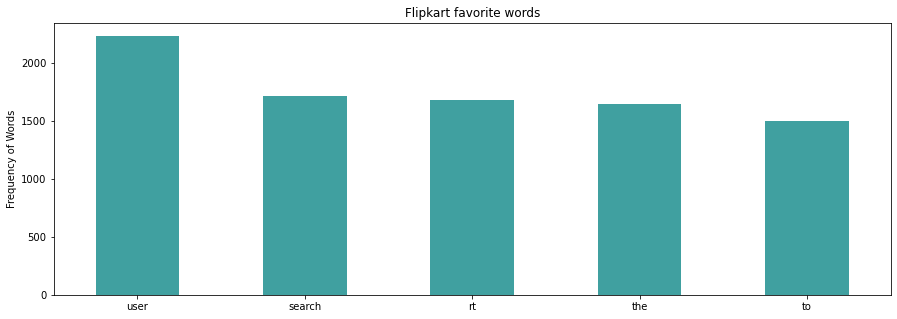

In [194]:
plt.figure(figsize=(15,5))
plt.title("Flipkart favorite words")

top_freq.plot(kind='bar',color='teal',alpha=0.75, rot=0)                            
plt.ylabel('Frequency of Words')
plt.show()

# WordCloud

In [195]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


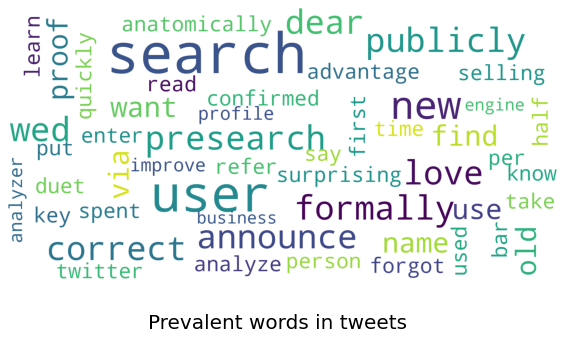

In [196]:
show_wordcloud(flipkart['clean_tweets'], title = 'Prevalent words in tweets')


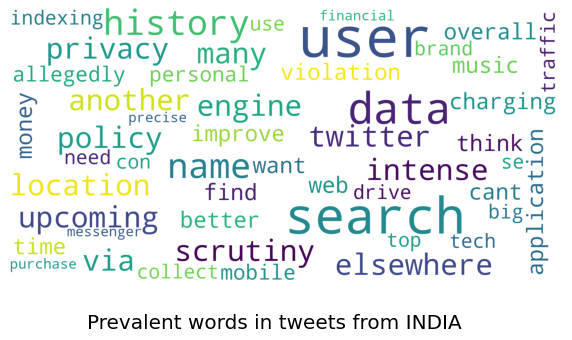

In [197]:
india_df = flipkart.loc[flipkart.User_location=="India"]
show_wordcloud(india_df['clean_tweets'], title = 'Prevalent words in tweets from INDIA ')

# User Tweet Location

In [198]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

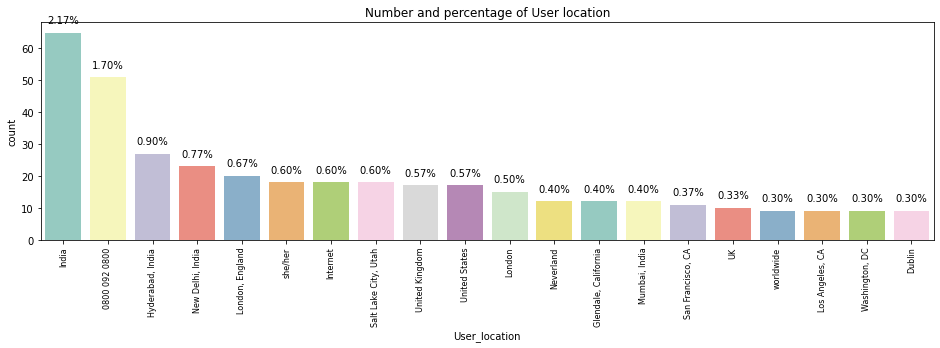

In [199]:
plot_count("User_location", "User location", flipkart,4)

In [201]:
loc_analysis = pd.DataFrame(flipkart['User_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'User_location':'count'})


In [202]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


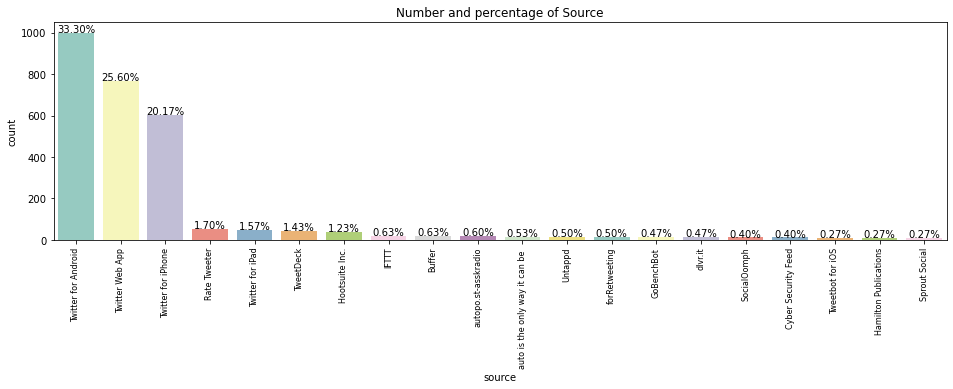

In [203]:
plot_count("source", "Source", flipkart,4)

# Analysis the Product of the FlipKart

In [212]:
flipkart_p = pd.read_csv('Flipkart_final.csv')


In [213]:
flipkart_p.head()

user location               source  \
0     DealsDhamaka      NaN      Twitter Web App   
1  panaromascandle      NaN  Twitter for Android   
2  Amazingdeals360    India  Twitter for Android   
3  DealBeeOfficial    India             Deal.Bee   
4      dealztrendz    India   Twitter for iPhone   

                                                                                                                                                    text  \
0                            SUPER OFFER FOR KIDS - Kellogg's Chocos Moons and Stars, 1.2kg at 320\n\nFLIPKART SELLING AT 640\n\nhttps://t.co/WI76ofKnJP   
1  Tip of the Day: For votive and glass filled candles, keep the wicks centered and trimmed to prevent the glass from breaking.\n\nBuy NOW: Amazon, N...   
2                          UPCOMING | Apple Iphone SE 2020\n\n₹27,999\n\nhttps://t.co/YYs1aJFaKV\n\n#BigSavingDays : 19th - 24th https://t.co/ylQJCQNf1u   
3                                                         KENSTAR Fresh 10L Water Heater at ₹4,125\n\nhttps://t.co/RzXCkmRYC1\n\nPC : Flipkart at ₹5,449   
4  1. Fake Or Not Quiz Answer\n\n1. Not Fake\n2. Not Fake\n3. Fake\n\n2. Daam Sahi Hai \n\n1. Less Than 12000\n2. Rs.3695\n3. Rs.59999\n\n3. Kya Bolt...   

                      product  
0  Camera & Photo Accessories  
1  Camera & Photo Accessories  
2  Camera & Photo Accessories  
3  Camera & Photo Accessories  
4  Camera & Photo Accessories

# Data Preprocessing and Data Cleaning

In [214]:
# To remove the Ascent letter
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [215]:
pd.set_option('display.max_colwidth',150)
flipkart_p.head(2)

user location               source  \
0     DealsDhamaka      NaN      Twitter Web App   
1  panaromascandle      NaN  Twitter for Android   

                                                                                                                                                    text  \
0                            SUPER OFFER FOR KIDS - Kellogg's Chocos Moons and Stars, 1.2kg at 320\n\nFLIPKART SELLING AT 640\n\nhttps://t.co/WI76ofKnJP   
1  Tip of the Day: For votive and glass filled candles, keep the wicks centered and trimmed to prevent the glass from breaking.\n\nBuy NOW: Amazon, N...   

                      product  
0  Camera & Photo Accessories  
1  Camera & Photo Accessories

In [216]:
flipkart_p['clean_tweets'] = (flipkart_p['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))

In [217]:
flipkart_p.clean_tweets=flipkart_p.text.str.lower()

In [218]:
# Removing Url
flipkart_p['clean_tweets'] = flipkart_p['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
flipkart_p.head(2)

user location               source  \
0     DealsDhamaka      NaN      Twitter Web App   
1  panaromascandle      NaN  Twitter for Android   

                                                                                                                                                    text  \
0                            SUPER OFFER FOR KIDS - Kellogg's Chocos Moons and Stars, 1.2kg at 320\n\nFLIPKART SELLING AT 640\n\nhttps://t.co/WI76ofKnJP   
1  Tip of the Day: For votive and glass filled candles, keep the wicks centered and trimmed to prevent the glass from breaking.\n\nBuy NOW: Amazon, N...   

                      product  \
0  Camera & Photo Accessories   
1  Camera & Photo Accessories   

                                                                                                                                            clean_tweets  
0                                                   super offer for kids - kellogg's chocos moons and stars, 1.2kg at 320\n\nflipkart selling at 640\n\n  
1  tip of the day: for votive and glass filled candles, keep the wicks centered and trimmed to prevent the glass from breaking.\n\nbuy now: amazon, n...

In [219]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [220]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [221]:
flipkart_p['clean_tweets']=flipkart_p['clean_tweets'].apply(lambda x : remove_punctuation(x))

In [222]:
# Remove Number
flipkart_p['clean_tweets'] = flipkart_p['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere

In [223]:
# Removing Stop Words
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [224]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
flipkart_p['clean_tweets'] = flipkart_p['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [225]:
# Replace the similar code
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [226]:
words = set(nltk.corpus.words.words())

In [227]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement

In [228]:
flipkart_p['clean_tweets']= flipkart_p.clean_tweets.apply(round2)

# Sentiment analyzer function

In [229]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'


In [230]:
flipkart_p['Sentiment'] = flipkart_p['clean_tweets'].apply(lambda x:analyze_sentiment(x))

In [231]:
flipkart_p['Sentiment'].value_counts().iplot(kind='bar',xTitle='Sentiment',
                                             yTitle='Count',title='Overall Sentiment Distribution')

In [232]:
word_series = pd.Series(' '.join(flipkart_p['clean_tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

In [233]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

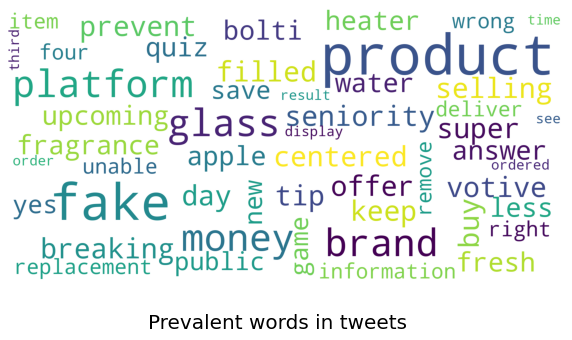

In [234]:
show_wordcloud(flipkart_p['clean_tweets'], title = 'Prevalent words in tweets')


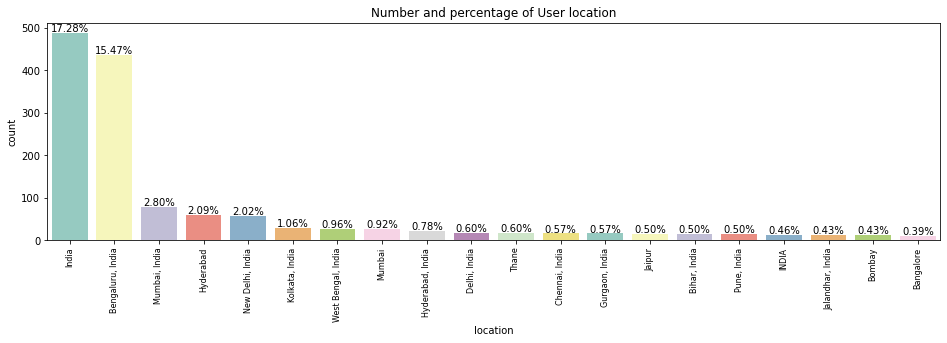

In [235]:
plot_count("location", "User location", flipkart_p,4)

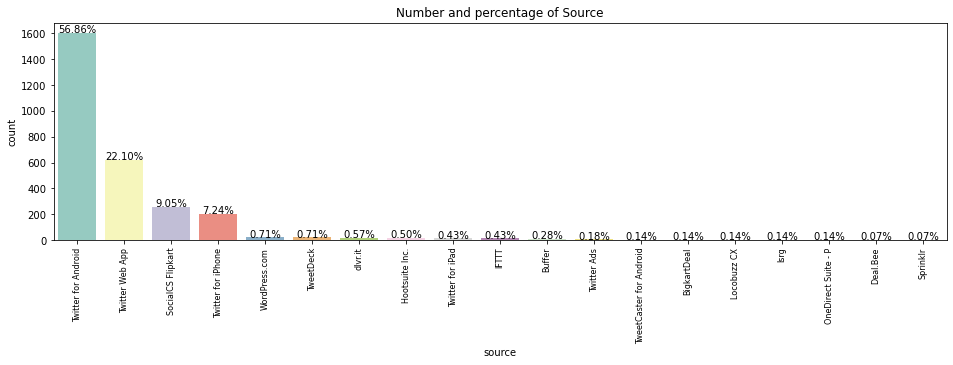

In [236]:
plot_count("source", "Source", flipkart_p,4)

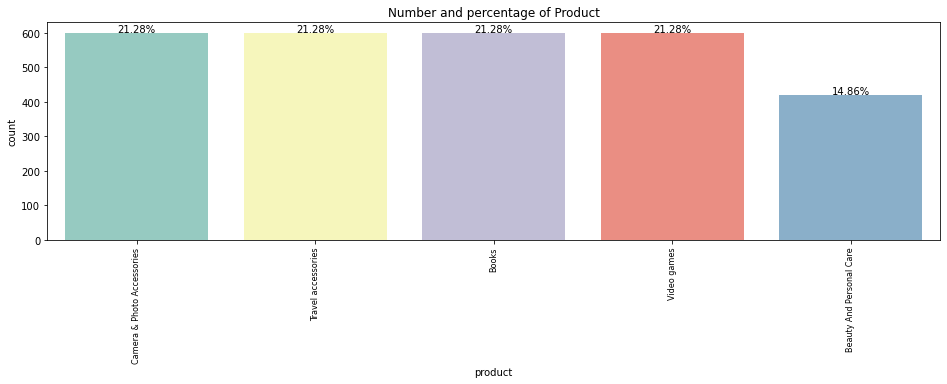

In [237]:
plot_count("product", "Product", flipkart_p,4)